In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv(r"C:/Users/AKSHAY/Downloads/Rishabh.txt",header=None,error_bad_lines=False,encoding='utf8')

In [2]:
df= df.drop(0)
df.columns=['Date', 'Convo', 'time', 'msg']

In [3]:
df=df.drop(columns=['time','msg'])

In [4]:
df

,Date,Convo
1,05/10/22,9:20 am - Rishab Kukkar: *विजयादशमी च्या हार्...
2,05/10/22,1:43 pm - Akshay: *Wishing you and your famil...
3,15/10/22,2:35 pm - Rishab Kukkar: Many many happy retu...
4,15/10/22,3:59 pm - Akshay: Ridela kadhi yenare
5,15/10/22,6:18 pm - Rishab Kukkar: Diwali week pasun ch...
...,...,...
116,10/04/23,6:03 pm - Rishab Kukkar: ho kara nivant
117,10/04/23,6:03 pm - Akshay: 👍🏻
118,10/04/23,6:03 pm - Rishab Kukkar: mi karto front end l...
119,10/04/23,6:03 pm - Rishab Kukkar: hya sunday la gheu call


In [5]:
Chat = df["Convo"].str.split("-", n=1, expand=True)
df['Time'] = Chat[0]
df['Content'] = Chat[1]

In [6]:
Chat1 = df['Content'].str.split(':', n=1, expand=True)
df['User'] = Chat1[0]
df['Message'] = Chat1[1]

In [7]:
df=df.drop(columns=['Convo'])
df['Message'] = df['Message'].str.lower()
df['Message']=df['Message'].str.replace('<media omitted>', ' ')
df['Message'] = df['Message'].str.replace('this message was deleted', 'DeletedMsg')

In [8]:
df

,Date,Time,Content,User,Message
1,05/10/22,9:20 am,Rishab Kukkar: *विजयादशमी च्या हार्दिक शुभेच्...,Rishab Kukkar,*विजयादशमी च्या हार्दिक शुभेच्छा☘️! हा दसरा त...
2,05/10/22,1:43 pm,Akshay: *Wishing you and your family a very H...,Akshay,*wishing you and your family a very happy dus...
3,15/10/22,2:35 pm,Rishab Kukkar: Many many happy returns of the...,Rishab Kukkar,many many happy returns of the day malak 🎂🍰🥳🎊🍻🍻
4,15/10/22,3:59 pm,Akshay: Ridela kadhi yenare,Akshay,ridela kadhi yenare
5,15/10/22,6:18 pm,Rishab Kukkar: Diwali week pasun chalu karu,Rishab Kukkar,diwali week pasun chalu karu
...,...,...,...,...,...
116,10/04/23,6:03 pm,Rishab Kukkar: ho kara nivant,Rishab Kukkar,ho kara nivant
117,10/04/23,6:03 pm,Akshay: 👍🏻,Akshay,👍🏻
118,10/04/23,6:03 pm,Rishab Kukkar: mi karto front end la kam chalu,Rishab Kukkar,mi karto front end la kam chalu
119,10/04/23,6:03 pm,Rishab Kukkar: hya sunday la gheu call,Rishab Kukkar,hya sunday la gheu call


In [9]:
df.to_csv('Rishabh.csv',index=False)

In [10]:
import matplotlib.pyplot as mpl
from wordcloud import WordCloud,STOPWORDS

In [11]:
df1=pd.read_csv('Rishabh.csv')
stopwords=set(STOPWORDS)
words=''.join(df1.Message.astype(str)).lower()
wordcloud=WordCloud(stopwords=stopwords, min_font_size=10,background_color='white',   width=800,height=800).generate(words)

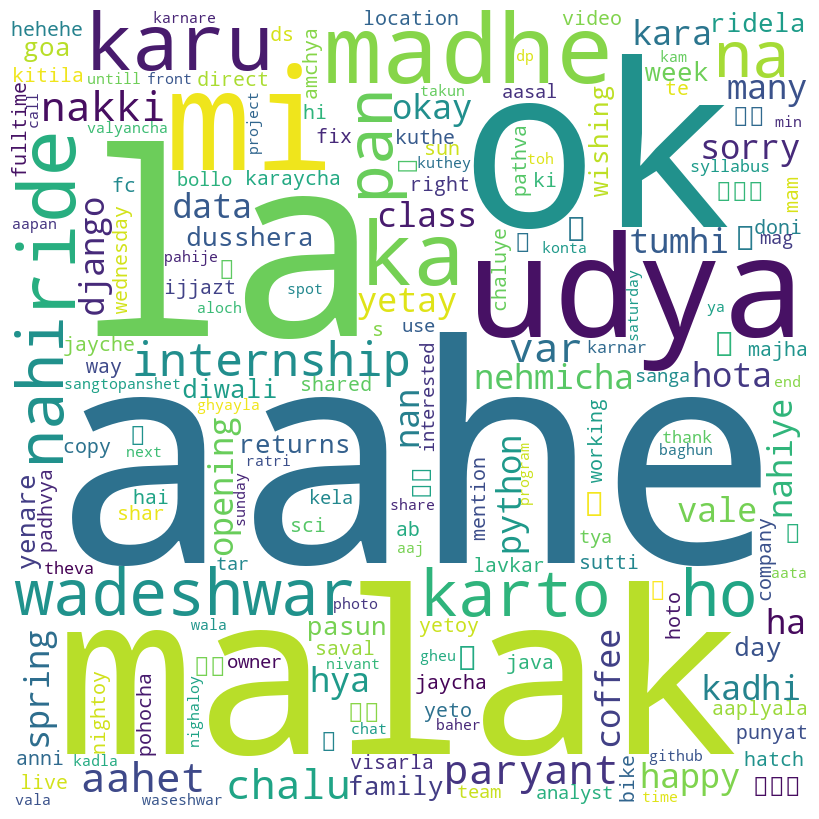

In [12]:
mpl.figure(figsize=(8,8),facecolor=None)
mpl.imshow(wordcloud, interpolation="bilinear")
mpl.axis("off")
mpl.tight_layout(pad=0)
mpl.show()